# Kaggle TGS Geoseismic competition

In [1]:
!pip install -q pydot
!pip install graphviz
from keras.utils import plot_model
#plot_model(model, to_file='model.png')
# Só funciona depois que reiniciar o runtime

Using TensorFlow backend.


In [1]:
!wget -q https://raw.githubusercontent.com/douglas125/McLyEdSegmentation/master/DeepLabv3Plus.py
!wget -q https://raw.githubusercontent.com/douglas125/McLyEdSegmentation/master/ImageReader.py
!wget -q https://raw.githubusercontent.com/douglas125/McLyEdSegmentation/master/ModelUNet.py
!wget -q https://raw.githubusercontent.com/douglas125/McLyEdSegmentation/master/models.py
!wget -q https://raw.githubusercontent.com/douglas125/McLyEdSegmentation/master/requirements.txt
!pip install -r requirements.txt


Redirecting output to ‘wget-log’.

Redirecting output to ‘wget-log.1’.

Redirecting output to ‘wget-log.2’.

Redirecting output to ‘wget-log.3’.

Redirecting output to ‘wget-log.4’.
    100% |████████████████████████████████| 61kB 2.3MB/s 
    100% |████████████████████████████████| 133kB 3.8MB/s 
    100% |████████████████████████████████| 235kB 5.5MB/s 
  Running setup.py bdist_wheel for kaggle ... - \ done
  Stored in directory: /root/.cache/pip/wheels/44/2c/df/22a6eeb780c36c28190faef6252b739fdc47145fd87a6642d4
  Running setup.py bdist_wheel for pydot ... - done
  Stored in directory: /root/.cache/pip/wheels/6a/a5/14/25541ebcdeaf97a37b6d05c7ff15f5bd20f5e91b99d313e5b4
  Running setup.py bdist_wheel for python-slugify ... - done
  Stored in directory: /root/.cache/pip/wheels/e3/65/da/2045deea3098ed7471eca0e2460cfbd3fdfe8c1d6fa6fcac92
Successfully built kaggle pydot python-slugify


In [2]:
!pip install kaggle

In [0]:
# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())

In [4]:
from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth

auth.authenticate_user()

drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'kaggle.json'", fields="files(id)").execute()
kaggle_api_key = results.get('files', [])

#filename = "/content/.kaggle/kaggle.json"
filename = os.path.expanduser("~/.kaggle/kaggle.json")
os.makedirs(os.path.dirname(filename), exist_ok=True)

request = drive_service.files().get_media(fileId=kaggle_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)

Download 100%.


In [0]:
#!mkdir ~/.kaggle
#!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

In [0]:
#!kaggle datasets list

In [7]:
!kaggle competitions download -c tgs-salt-identification-challenge --force

  0% 0.00/322k [00:00<?, ?B/s]
100% 322k/322k [00:00<00:00, 65.7MB/s]
  0% 0.00/264k [00:00<?, ?B/s]
100% 264k/264k [00:00<00:00, 80.0MB/s]
  0% 0.00/922k [00:00<?, ?B/s]
100% 922k/922k [00:00<00:00, 63.9MB/s]
 94% 153M/163M [00:01<00:00, 126MB/s]
100% 163M/163M [00:01<00:00, 116MB/s]
 95% 36.0M/37.9M [00:00<00:00, 49.3MB/s]
100% 37.9M/37.9M [00:00<00:00, 74.2MB/s]


In [0]:
import zipfile
zip_ref = zipfile.ZipFile('train.zip', 'r')
zip_ref.extractall('trainData')
zip_ref.close()

In [0]:
zip_ref = zipfile.ZipFile('test.zip', 'r')
zip_ref.extractall('testData')
zip_ref.close()

In [10]:
!git clone https://github.com/qubvel/segmentation_models.git
!cp -a segmentation_models/. segmentation_models/..
!git submodule update --init --recursive

Cloning into 'segmentation_models'...
remote: Counting objects: 312, done.
remote: Compressing objects: 100% (148/148), done.
remote: Total 312 (delta 100), reused 78 (delta 31), pack-reused 124
Receiving objects: 100% (312/312), 74.02 KiB | 428.00 KiB/s, done.
Resolving deltas: 100% (163/163), done.
Submodule 'segmentation_models/backbones/classification_models' (git://github.com/qubvel/classification_models.git) registered for path 'segmentation_models/backbones/classification_models'
Cloning into '/content/segmentation_models/backbones/classification_models'...
Submodule path 'segmentation_models/backbones/classification_models': checked out '9e438e2e133897b115148c737abdda3e1db31787'


In [13]:
!pip3 install --upgrade tensorflow-gpu==1.4

    100% |████████████████████████████████| 170.3MB 245kB/s 
    100% |████████████████████████████████| 1.7MB 8.9MB/s 
    100% |████████████████████████████████| 890kB 1.7MB/s 
  Running setup.py bdist_wheel for html5lib ... - \ done
  Stored in directory: /root/.cache/pip/wheels/50/ae/f9/d2b189788efcf61d1ee0e36045476735c838898eef1cad6e29
Successfully built html5lib
  Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Found existing installation: bleach 2.1.4
    Uninstalling bleach-2.1.4:
      Successfully uninstalled bleach-2.1.4
  Found existing installation: tensorflow-gpu 1.10.0
    Uninstalling tensorflow-gpu-1.10.0:
      Successfully uninstalled tensorflow-gpu-1.10.0


In [11]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tqdm import tqdm_notebook, tnrange, tqdm
import gc
gc.collect()
%load_ext autoreload
%autoreload 2

import ImageReader

im_height = 101
im_width = 101
im_chan = 1

import ModelUNet

from keras.utils import plot_model
from keras.models import Model, load_model
from keras.layers import Input, ZeroPadding2D, Cropping2D, Add, Conv2D, Concatenate, UpSampling2D, MaxPooling2D
from keras.layers.core import Lambda
import DeepLabv3Plus
from segmentation_models import Unet
from segmentation_models.utils import set_trainable

Using TensorFlow backend.


In [0]:
trainFolder = 'trainData/'
testFolder  = 'testData/'
depthFile = pd.read_csv('depths.csv' )

In [0]:
train_ids = next(os.walk(trainFolder +"images"))[2]
test_ids = next(os.walk(testFolder +"images"))[2]

In [0]:
ImageReader.ignoreList += ['59597a8431.png', '0d3b5ec2a8.png', '3fd616ef00.png', '9a4f625408.png', '2b77f82b42.png', '608567ed23.png', '5b217529e7.png', 'a266a2a9df.png', 'ca2e414e83.png', '96523f824a.png', 'dd580d1681.png', 'f19b7d20bb.png', 'b9a7c521ac.png', '58de316918.png', '39cd06da7d.png', '60dccbc52f.png', '6460ce2df7.png', '7ed0489985.png', '99b602dde4.png', 'ebcd41b5f1.png', '00950d1627.png', '73a4c6a4bb.png', 'e446b0b4b6.png', '6bc4c91c27.png', 'd1c9be7e25.png', 'ba1287cb48.png', '2787bfe603.png', '9a4b15919d.png', 'ca511bc319.png', 'bbb5279a06.png']

In [0]:
ImageReader.ignoreList = []

In [15]:
X_train, Y_train, depthVals = ImageReader.ReadSegmentationImages(trainFolder, depthFile)
X_train = X_train/255.0

  1%|          | 21/4000 [00:00<00:19, 203.96it/s]

Getting images and masks ... 


100%|██████████| 4000/4000 [00:15<00:00, 256.35it/s]


Ignored 0 files


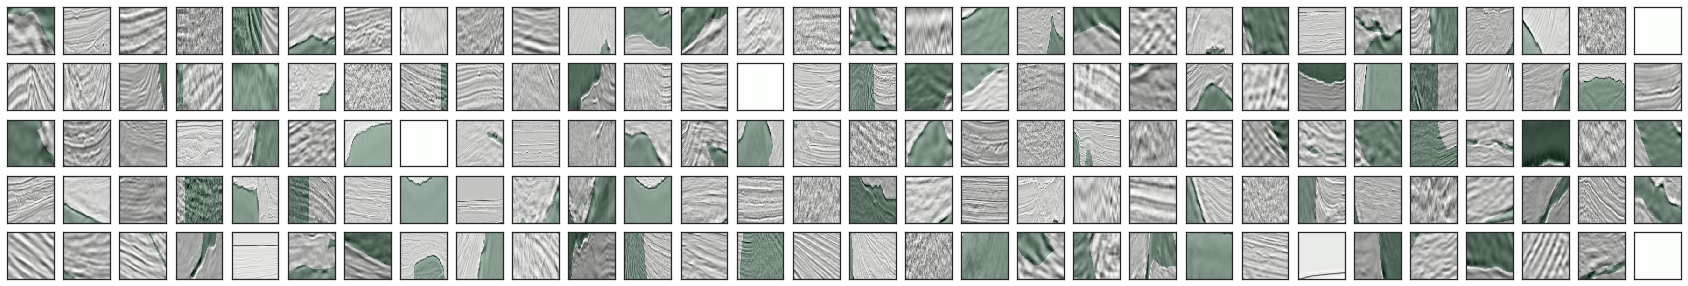

In [33]:
max_images = 150
grid_width = 30
grid_height = int(max_images / grid_width)
fig, axs = plt.subplots(grid_height, grid_width, figsize=(grid_width, grid_height))
for i, idx in enumerate(X_train[:max_images]):
    img = X_train[i,:,:,0]
    mask = Y_train[i,:,:,0]
    ax = axs[int(i / grid_width), i % grid_width]
    ax.imshow(img, cmap="Greys")
    ax.imshow(mask, alpha=0.3, cmap="Greens")
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

In [23]:
valRatio = 0.08
nVal = int(len(X_train)*valRatio)
p = np.random.RandomState(seed=40).permutation(len(X_train))

X_val = X_train[p][0:nVal]
Y_val = Y_train[p][0:nVal]
d_val = depthVals[p][0:nVal]

X_train0 = X_train[p][nVal:]
Y_train0 = Y_train[p][nVal:]
d_train0 = depthVals[p][nVal:]
X_train0.shape
print('{}, {}, {}'.format(X_train0.shape, X_val.shape, d_val.shape))

(3680, 101, 101, 1), (320, 101, 101, 1), (320, 1, 1, 1)


# Keras datagen

In [0]:
max_images = 120
offset = 3100
grid_width = 30
grid_height = int(max_images / grid_width)
fig, axs = plt.subplots(grid_height, grid_width, figsize=(grid_width, grid_height))
for i, idx in enumerate(X_train0[offset:offset + max_images]):
    img = X_train0[i + offset,:,:,0]
    mask = Y_train0[i + offset,:,:,0]
    ax = axs[int(i / grid_width), i % grid_width]
    ax.imshow(img, cmap="Greys")
    ax.imshow(mask, alpha=0.3, cmap="Greens")
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from skimage.transform import rescale, resize, downscale_local_mean

# we create two instances with the same arguments
data_gen_argsMask = dict(
                     rotation_range=12.0, #1.0,
                     shear_range = 3.0, #0
                     zoom_range = [0.8, 1.2], #0.013
                     width_shift_range=0.2, # 0.03,
                     height_shift_range=0.2, #0.3,
                     horizontal_flip=True,
                     cval=0,
                     fill_mode="reflect"  #reflect
                     #vertical_flip=True #see if helps
                    )

data_gen_args = {}
for key in data_gen_argsMask:
    data_gen_args[key] = data_gen_argsMask[key]
    
#data_gen_args['featurewise_center'] = True
#data_gen_args['featurewise_std_normalization'] = True
#data_gen_args['zca_whitening'] = True #this or normalization

image_datagen = ImageDataGenerator(**data_gen_args)
mask_datagen = ImageDataGenerator(**data_gen_argsMask)
depth_datagen = ImageDataGenerator()


seed=7
bSize = 32
# Provide the same seed and keyword arguments to the fit and flow methods
image_datagen.fit(X_train0, augment=True, seed=seed)
#mask_datagen.fit(Y_train0, augment=True, seed=seed)
#depth_datagen.fit(d_train0, augment=False, seed=seed)

image_generator = image_datagen.flow(
    X_train0,
    seed=seed,
    batch_size = bSize)#32*nGPUs)

mask_generator = mask_datagen.flow(
    Y_train0,
    seed=seed,
    batch_size = bSize)#32*nGPUs)

depth_generator = depth_datagen.flow(
    d_train0,
    seed=seed,
    batch_size = bSize)#32*nGPUs)

#maximum random crop image size
randomCropMaxSize=200
def multi_input_gen(X1, X2, X3):
    genX1 = image_datagen.flow(X1, seed=7, batch_size=bSize)
    genX2 = depth_datagen.flow(X2, seed=7, batch_size=bSize)
    genX3 = mask_datagen.flow(X3, seed=7, batch_size=bSize)
    while True:
        X1i = genX1.next()
        X2i = genX2.next()
        X3i = genX3.next()
        for x1 in X1i:
            random_max = 1 / x1.max()
            if random_max > 1.15:
                random_max = 1.15
            x1 *= np.random.uniform(0.85, random_max)
        yield [X1i, X2i], X3i
#            
#def ResizeAndCrop(img, newShape, cropPos):
#    img_resized = resize(img, newShape, mode='reflect')
#    ans = img_resized[cropPos[0]:cropPos[0]+img.shape[0], cropPos[1]:cropPos[1]+img.shape[1]]
#    return ans

train_generator = multi_input_gen(X_train0, d_train0, Y_train0) #zip( [image_generator, depth_generator] , [mask_generator] )

In [0]:
for x in train_generator:
    max_images = len(x[1])

    grid_width = 8
    grid_height = int(max_images / grid_width)
    fig, axs = plt.subplots(grid_height, grid_width, figsize=(grid_width * 3, grid_height * 3))
    fig.patch.set_facecolor('xkcd:mint green')
    cmap = plt.cm.gray
    cmap.set_bad(color='black')
    for i, idx in enumerate(x[1]):
        img = x[0][0][i,:,:,0]
        mask = x[1][i,:,:,0]
        ax = axs[int(i / grid_width), i % grid_width]
        ax.imshow(img, vmin=0, vmax=1, cmap=cmap)
        ax.imshow(mask, alpha=0.3, cmap="Greens", vmin=0, vmax=1)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
    break

In [0]:
from keras.layers import Conv2D
from keras.layers import Activation
from keras.models import Model
from segmentation_models.unet.blocks import Transpose2D_block, Upsample2D_block
from segmentation_models.utils import get_layer_number, to_tuple
from segmentation_models.backbones import get_backbone
from segmentation_models.unet.model import DEFAULT_SKIP_CONNECTIONS

def my_resnet(input_layer, backbone_name='vgg16',
         input_shape=(None, None, 3),
         input_tensor=None,
         encoder_weights='imagenet',
         freeze_encoder=False,
         skip_connections='default',
         decoder_block_type='upsampling',
         decoder_filters=(256,128,64,32,16),
         decoder_use_batchnorm=False,
         n_upsample_blocks=5,
         upsample_rates=(2,2,2,2,2),
         classes=1,
         activation='sigmoid'):
  
    backbone = get_backbone(backbone_name,
                            input_shape=input_shape,
                            input_tensor=input_tensor,
                            weights=encoder_weights,
                            include_top=False)
    
    if skip_connections == 'default':
        skip_connections = DEFAULT_SKIP_CONNECTIONS[backbone_name]
        
        
    x = backbone(input_layer)
    
    if decoder_block_type == 'transpose':
        up_block = Transpose2D_block
    else:
        up_block = Upsample2D_block

    # convert layer names to indices
    skip_connection_idx = ([get_layer_number(backbone, l) if isinstance(l, str) else l
                               for l in skip_connections])

    for i in range(n_upsample_blocks):

        # check if there is a skip connection
        skip_connection = None
        if i < len(skip_connection_idx):
            skip_connection = backbone.layers[skip_connection_idx[i]].output

        upsample_rate = to_tuple(upsample_rates[i])

        x = up_block(decoder_filters[i], i, upsample_rate=upsample_rate,
                     skip=skip_connection, use_batchnorm=decoder_use_batchnorm)(x)

    x = Conv2D(classes, (3,3), padding='same', name='final_conv')(x)
    #x = Activation(activation, name=activation)(x)
    
    return x

# Test baseline model

In [18]:
from segmentation_models import Unet
from segmentation_models.utils import set_trainable

im_height = 101
im_width = 101
im_chan = 1


inputs = Input((im_height, im_width, im_chan))
#s = Lambda(lambda x: x / 255) (inputs)
s=inputs
inputDepth = Input( (1,1,1) )


curLayer = inputs

curLayer = UpSampling2D(size=(2, 2))(curLayer)
#s = ReflectionPadding2D( padding = ((13, 14), (13, 14)) ) (s)
s = ZeroPadding2D( padding = ((27, 27), (27, 27)) ) (curLayer)
s = Conv2D(3, (1, 1), activation='relu') (s) #(1,1)

resnet = Unet(backbone_name='resnet34', encoder_weights='imagenet', input_shape=(256, 256, 3), activation=None) #, freeze_encoder=True

outputs = resnet(s)
outputs = Cropping2D(cropping=((27, 27), (27, 27)) ) (outputs)
outputs = MaxPooling2D(pool_size=(2, 2), padding='same')(outputs)

dd = Lambda(lambda x: x * 0.001) (inputDepth)
dd = Lambda(lambda x: ModelUNet._expand(x, 101, 101) )(dd)
outputs = Concatenate()([outputs, dd])

outputs = Conv2D(1, (1, 1), activation='sigmoid') (outputs)

#model = Model(inputs=[inputs], outputs=[outputs, outputs])
#model.compile(optimizer='adam', loss=['binary_crossentropy', dice_loss], loss_weights=[0.01, 1.2], metrics=[mean_iou])
model = Model(inputs=[inputs, inputDepth], outputs=outputs)
model.compile(optimizer='adam', loss=[ModelUNet.dice_loss], metrics=[ModelUNet.mean_iou])  #dice_loss
model.summary()

85524480/85521592 [==============================] - 19s 0us/step
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 101, 101, 1)  0                                            
__________________________________________________________________________________________________
up_sampling2d_1 (UpSampling2D)  (None, 202, 202, 1)  0           input_1[0][0]                    
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 256, 256, 1)  0           up_sampling2d_1[0][0]            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 3)  6           zero_padding2d_1[0][0]           
___________________________________________

In [0]:
model.load_weights('model-tgs-salt-1.h5')

In [59]:
input_x = model.layers[0].input

output_layer = model.layers[-2].output
output_layer2 = Conv2D(1, (1, 1), activation=None) (output_layer)
model_lovasz = Model(inputs=[input_x, model.layers[-7].output], outputs=output_layer2)
model_lovasz.compile(optimizer='adam', loss=[ModelUNet.lovasz_loss], metrics=[ModelUNet.mean_iou])
model_lovasz.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 101, 101, 1)  0                                            
__________________________________________________________________________________________________
up_sampling2d_1 (UpSampling2D)  (None, 202, 202, 1)  0           input_1[0][0]                    
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 256, 256, 1)  0           up_sampling2d_1[0][0]            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 3)  6           zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
u-resnet34

In [67]:
index = 0
trainable_count=2
tries=10
last_loss = 0.2831

while index < len(resnet.layers) - 1:
    trainable_layers = []
    for layer in resnet.layers:
        layer.trainable = False
    count = 0
    for layer in reversed(resnet.layers[:len(resnet.layers) - index]):
        count += 1
        if layer.count_params() > 0:
            trainable_layers.append(layer)
            if len(trainable_layers) == trainable_count:
                break
    index += count
    for layer in trainable_layers:
        layer.trainable = True
    model_lovasz.compile(model_lovasz.optimizer, model_lovasz.loss, model_lovasz.metrics)
    print('Training ' + str([t.name for t in trainable_layers]))

    best_weights = 'best_weights.h5'

    best_loss = last_loss
    resnet.save_weights(best_weights)
    resnet.save_weights('original_weights')

    for try_number in range(tries):
        history2 = model_lovasz.fit_generator(train_generator, epochs=5 * try_number + 1, steps_per_epoch=len(X_train0) / bSize, 
                              validation_data=( [X_val, d_val], Y_val),
                              callbacks=[lrate], initial_epoch=5 * try_number)
        if best_loss > history2.history["val_loss"][-1]:
            print('Loss improved from ' + str(best_loss) + ' to ' + str(history2.history["val_loss"][-1]) )
            best_loss = history2.history["val_loss"][-1]
            resnet.save_weights(best_weights)

        resnet.load_weights('original_weights')
    print('Using loss ' + str(best_loss))
    last_loss = best_loss
    resnet.load_weights(best_weights)

Training ['final_conv', 'decoder_stage4_conv2']
Epoch 1/1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in true_divide


Changing learning rate to 0.001
115/115 [==============================] - 177s 2s/step - loss: 0.2991 - mean_iou: 0.8360 - val_loss: 0.2685 - val_mean_iou: 0.8797
Loss improved from 0.2831 to 0.2684880942106247
Epoch 6/6
Changing learning rate to 0.001
115/115 [==============================] - 159s 1s/step - loss: 0.3037 - mean_iou: 0.8764 - val_loss: 0.2650 - val_mean_iou: 0.8783
Loss improved from 0.2684880942106247 to 0.26501710563898084
Epoch 11/11
Changing learning rate to 0.0005
115/115 [==============================] - 159s 1s/step - loss: 0.3031 - mean_iou: 0.8756 - val_loss: 0.2604 - val_mean_iou: 0.8772
Loss improved from 0.26501710563898084 to 0.2603863149881363
Epoch 16/16
Changing learning rate to 0.0005
115/115 [==============================] - 159s 1s/step - loss: 0.2948 - mean_iou: 0.8762 - val_loss: 0.2637 - val_mean_iou: 0.8782
Epoch 21/21
Changing learning rate to 0.00025
115/115 [==============================] - 159s 1s/step - loss: 0.2975 - mean_iou: 0.8763 - 

KeyboardInterrupt: ignored

In [60]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    #epoch = epoch - 75
    initial_lrate = 1e-3
    drop = 0.5
    epochs_drop = 10
    lrate = initial_lrate * math.pow(drop,
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 1e-5):
        lrate = 1e-5

    print('Changing klearning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
earlystopper = EarlyStopping(patience=100, verbose=1)
checkpointer = ModelCheckpoint('model-tgs-salt-1.h5', verbose=1, save_best_only=True)
internalEval = ModelUNet.IntervalEvaluation( validation_data=( [X_val, d_val], Y_val), interval = 1 )

history = model_lovasz.fit_generator(train_generator, epochs=60, steps_per_epoch=len(X_train0) / bSize, 
                              validation_data=( [X_val, d_val], Y_val),
                              callbacks=[earlystopper, checkpointer, lrate, internalEval]) #, initial_epoch=150


Epoch 1/60


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in true_divide


Changing klearning rate to 0.001
115/115 [==============================] - 207s 2s/step - loss: 0.4231 - mean_iou: 0.8499 - val_loss: 0.4913 - val_mean_iou: 0.8467

Epoch 00001: val_loss improved from inf to 0.49131, saving model to model-tgs-salt-1.h5
320/320 [==============================] - 6s 19ms/step
Accurate validation score is 0.7309375. Best so far is 0
Saving model-tgs-salt-IV.h5
Epoch 2/60
Changing klearning rate to 0.001
115/115 [==============================] - 189s 2s/step - loss: 0.4144 - mean_iou: 0.8441 - val_loss: 0.4290 - val_mean_iou: 0.8448

Epoch 00002: val_loss improved from 0.49131 to 0.42904, saving model to model-tgs-salt-1.h5
320/320 [==============================] - 4s 11ms/step
Accurate validation score is 0.78125. Best so far is 0.7309375
Saving model-tgs-salt-IV.h5
Epoch 3/60
Changing klearning rate to 0.001
115/115 [==============================] - 189s 2s/step - loss: 0.4267 - mean_iou: 0.8416 - val_loss: 0.4734 - val_mean_iou: 0.8406

Epoch 00003:

In [0]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    #epoch = epoch - 75
    initial_lrate = 1e-4
    drop = 0.6
    epochs_drop = 15
    lrate = initial_lrate * math.pow(drop,
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 1e-6):
        lrate = 1e-6

    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)

In [25]:
earlystopper = EarlyStopping(patience=100, verbose=1)
checkpointer = ModelCheckpoint('model-tgs-salt-1.h5', verbose=1, save_best_only=True)
internalEval = ModelUNet.IntervalEvaluation( validation_data=( [X_val, d_val], Y_val), interval = 1 )

history = model.fit_generator(train_generator, epochs=120, steps_per_epoch=len(X_train0) / bSize, 
                              validation_data=( [X_val, d_val], Y_val),
                              callbacks=[earlystopper, checkpointer, lrate, internalEval]) #, initial_epoch=150


Epoch 1/120
Changing learning rate to 0.0001


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in true_divide


115/115 [==============================] - 129s 1s/step - loss: 0.0219 - mean_iou: 0.8734 - val_loss: 0.0178 - val_mean_iou: 0.8810

Epoch 00001: val_loss improved from inf to 0.01778, saving model to model-tgs-salt-1.h5
320/320 [==============================] - 5s 15ms/step
Accurate validation score is 0.8331250000000001. Best so far is 0
Saving model-tgs-salt-IV.h5
Epoch 2/120
Changing learning rate to 0.0001
115/115 [==============================] - 127s 1s/step - loss: 0.0211 - mean_iou: 0.8826 - val_loss: 0.0182 - val_mean_iou: 0.8835

Epoch 00002: val_loss did not improve from 0.01778
320/320 [==============================] - 4s 12ms/step
Accurate validation score is 0.8331250000000001. Best so far is 0.8331250000000001
Epoch 3/120
Changing learning rate to 0.0001
115/115 [==============================] - 127s 1s/step - loss: 0.0211 - mean_iou: 0.8843 - val_loss: 0.0179 - val_mean_iou: 0.8836

Epoch 00003: val_loss did not improve from 0.01778
320/320 [=======================

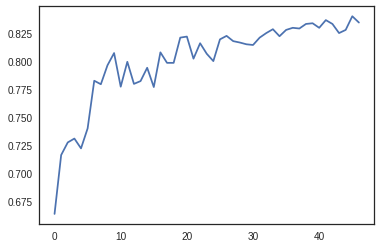

In [81]:
plt.plot(internalEval.score_list[4:])

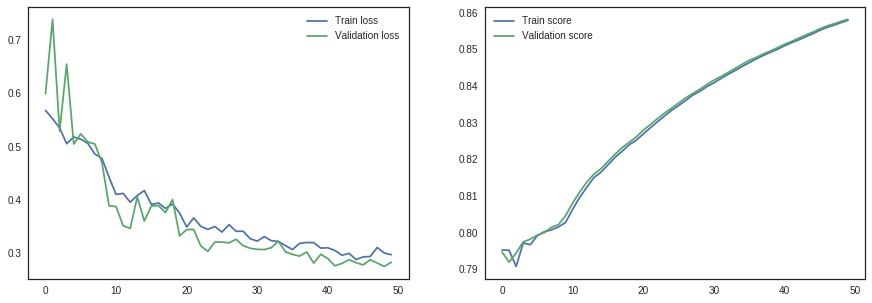

In [82]:
fig, (ax_loss, ax_score) = plt.subplots(1, 2, figsize=(15,5))
ax_loss.plot(history.epoch, history.history["loss"], label="Train loss")
ax_loss.plot(history.epoch, history.history["val_loss"], label="Validation loss")
ax_loss.legend()
ax_score.plot(history.epoch, history.history["mean_iou"], label="Train score")
ax_score.plot(history.epoch, history.history["val_mean_iou"], label="Validation score")
ax_score.legend()

# Predictions

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

saved_model = drive.CreateFile({'id': '1O2JNWeckMMmK6fl_gv9WkWBxFxABQ9Wu'})
saved_model.GetContentFile('model-tgs-salt-1.h5')

In [0]:
model = load_model('model-tgs-salt-1.h5', custom_objects={'mean_iou': ModelUNet.mean_iou, 'dice_loss' : ModelUNet.dice_loss, 'ModelUNet': ModelUNet, 'Unet': Unet,
                                                          'lovasz_loss': ModelUNet.lovasz_loss,
                                                           '_expand': ModelUNet._expand, 'relu6': DeepLabv3Plus.relu6, 'BilinearUpsampling': DeepLabv3Plus.BilinearUpsampling })
#model.save('model-tgs-salt-1.h5')

In [29]:
X_test, d_test = ImageReader.ReadSegmentationImages(testFolder, depthFile, readMasks = False)
X_test = X_test/255.0 #(X_test-X_train_mean)/(2*X_train_std)

  0%|          | 30/18000 [00:00<01:01, 293.29it/s]

Getting images and masks ... 


100%|██████████| 18000/18000 [01:03<00:00, 285.34it/s]


Ignored 0 files


In [77]:
preds_test_raw = model.predict([X_test, d_test], verbose=1)

18000/18000 [==============================] - 213s 12ms/step


In [0]:
preds_test = (preds_test_raw > 0.0).astype(np.uint8).squeeze()

In [0]:
import math
def pred_certainty(pred):
    return np.sum(np.abs(pred - 0.5))
def low_count(pred):
    return (pred < 0.5).sum()
def high_count(pred):
    return (pred > 0.5).sum()

In [79]:
# Fazer array de dicionários com informações dos resultados
preds_test_dict = []
for i, p in tqdm(enumerate(preds_test)):
    pred_dict = {'pred': p, 'pred_raw': preds_test_raw[i].squeeze(), 'certainty': pred_certainty(preds_test_raw[i]), 'img': X_test[i,:,:,0], 'file': test_ids[i],
                 'var': preds_test_raw[i].var(), 'depth': d_test[i], 'max': high_count(preds_test_raw[i]), 'min': low_count(preds_test_raw[i])}
    preds_test_dict.append(pred_dict)

preds_test_dict.sort(key=lambda x: x['certainty'], reverse=True)

18000it [00:02, 6849.53it/s]


In [80]:
certainty_sum = 0
for pred_dict in preds_test_dict:
    certainty_sum += pred_dict['certainty']
model_quality = certainty_sum / len(preds_test_dict)
print(model_quality)

15310.07155472819


In [81]:
len([p for p in preds_test_dict if 2000 < p['min'] and p['min'] < 9000])

6136

In [0]:
def compare(dicts, max_images=10, offset=0, imgs_size_multiplier=4):
    grid_width = 4

    for i, idx in enumerate(dicts[offset:offset + max_images]):
        plt.figure(i)
        fig = plt.figure()
        fig.patch.set_facecolor('xkcd:mint green')
        params = plt.gcf()
        plSize = params.get_size_inches()
        params.set_size_inches( (plSize[0]*imgs_size_multiplier, plSize[1]*imgs_size_multiplier) )
        cmap = plt.cm.gray
        cmap.set_bad(color='black')

        ax = plt.subplot(1, grid_width, 1)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        plt.imshow(idx['pred_raw'], vmin=0, vmax=1, cmap=cmap)
        plt.title("Prediction")

        ax = plt.subplot(1, grid_width, 2)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        plt.imshow(idx['img'], vmin=0, vmax=1, cmap=cmap)
        plt.title("Img")
        plt.grid(False)

        ax = plt.subplot(1, grid_width, 3)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        plt.imshow(idx['pred'], vmin=0, vmax=1, cmap=cmap)
        plt.title("Mask")
        plt.grid(False)
        
        ax = plt.subplot(1, grid_width, 4)
        ax.annotate('certainty: ' + str(idx['certainty']), xy=(0.1, 0.9), textcoords='axes fraction',
                    horizontalalignment='left', verticalalignment='top')
        ax.annotate('min: ' + str(idx['min']), xy=(0.1, 0.8), textcoords='axes fraction',
                    horizontalalignment='left', verticalalignment='top')
        ax.annotate('max: ' + str(idx['max']), xy=(0.1, 0.7), textcoords='axes fraction',
                    horizontalalignment='left', verticalalignment='top')
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        plt.imshow(np.zeros((im_height, im_width), dtype=np.uint8))


/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:2108: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  warnings.warn("You have used the `textcoords` kwarg, but not "


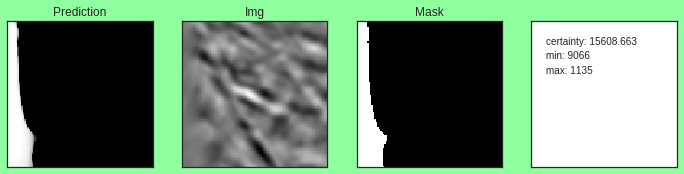

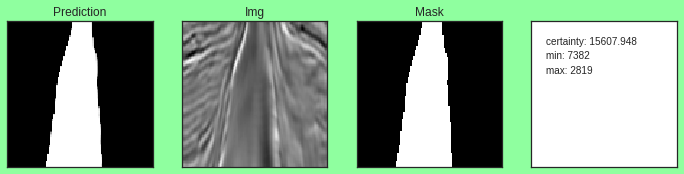

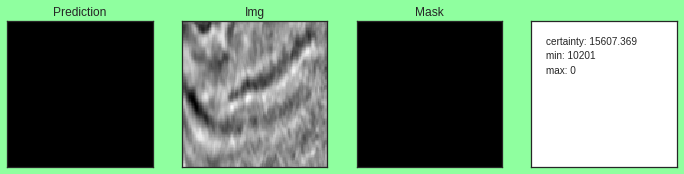

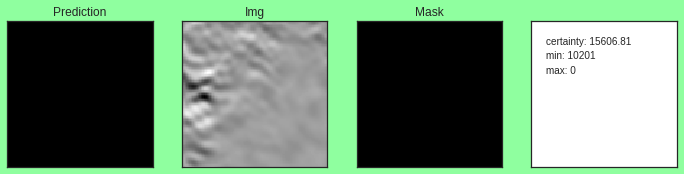

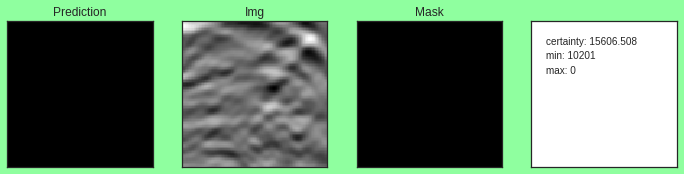

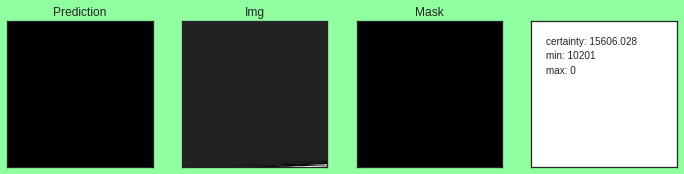

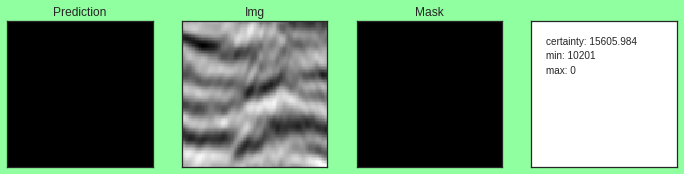

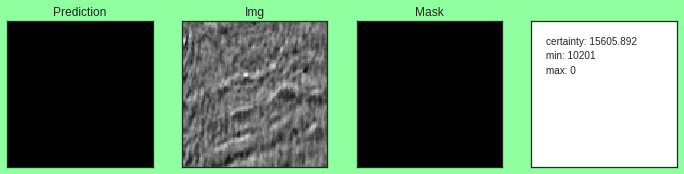

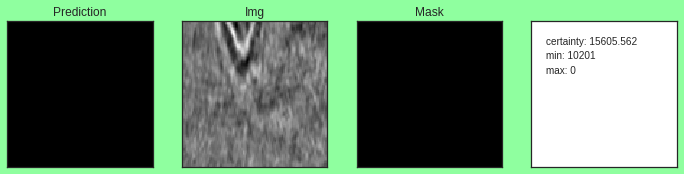

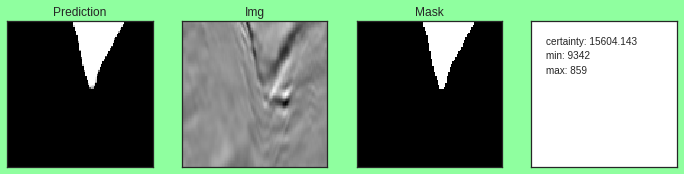

In [69]:
compare(preds_test_dict, max_images=10, offset=10000, imgs_size_multiplier=2)

In [0]:
file_index = 1
#amount = 1000

only_best_dict = [p for p in preds_test_dict if p['certainty'] > 5000]

# Best balanced results
file_names_to_save = [p['file'] for p in only_best_dict if 2000 < p['min'] and p['min'] < 9000][:1200]
predictions_to_save = [p['pred'] for p in only_best_dict if 2000 < p['min'] and p['min'] < 9000][:1200]
depths_to_save = [p['depth'] for p in only_best_dict if 2000 < p['min'] and p['min'] < 9000][:1200]

# Best no salt results
file_names_to_save = np.concatenate((file_names_to_save, [p['file'] for p in only_best_dict if 1000 > p['min']][:200]), axis=0)
predictions_to_save = np.concatenate((predictions_to_save, [p['pred'] for p in only_best_dict if 1000 > p['min']][:200]), axis=0)
depths_to_save = np.concatenate((depths_to_save, [p['depth'] for p in only_best_dict if 1000 > p['min']][:200]), axis=0)

# Best full salt results
file_names_to_save = np.concatenate((file_names_to_save, [p['file'] for p in only_best_dict if 7000 < p['min']][:100]), axis=0)
predictions_to_save = np.concatenate((predictions_to_save, [p['pred'] for p in only_best_dict if 7000 < p['min']][:100]), axis=0)
depths_to_save = np.concatenate((depths_to_save, [p['depth'] for p in only_best_dict if 7000 < p['min']][:100]), axis=0)

# Saving the best predictions from test set:
import pickle
with open('best_predictions' + str(file_index) + '.pkl', 'wb') as f:
    pickle.dump([file_names_to_save, depths_to_save, predictions_to_save], f)

# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create & upload a file.
uploaded = drive.CreateFile({'title': 'best_predictions' + str(file_index) + '.pkl'})
uploaded.SetContentFile('best_predictions' + str(file_index) + '.pkl')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))    

# Getting back the objects:
#with open('best_predictions0.pkl', 'rb') as f:
#    file_names, Y_train_extras = pickle.load(f)

Uploaded file with ID 1Yvllok09wtNYIRp9kkTGPeJ5p6UO6oU9


# Prepare Submission

7978 of 18000


Text(0.5,0,'Coverage class')

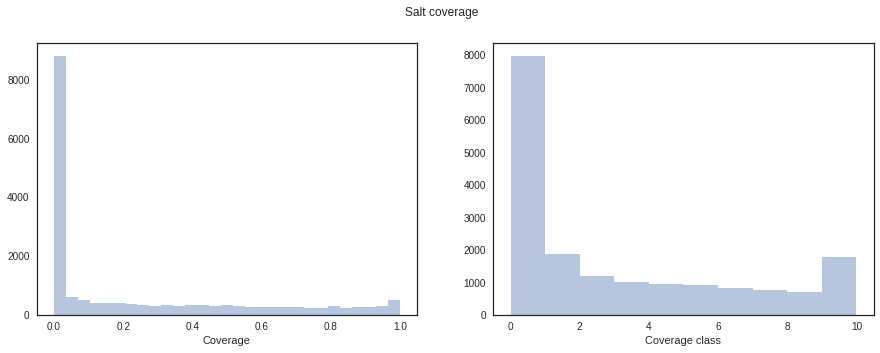

In [82]:
import seaborn as sns
sns.set_style("white")

coverage = np.array([np.sum(p) for p in preds_test]) / pow(101, 2)
def cov_to_class(val):
    for i in range(0, 11):
        if val * 10 <= i :
            return i

coverage_class = [cov_to_class(c) for c in coverage]
print(str(len([c for c in coverage_class if c == 0])) + ' of ' + str(len(preds_test)))
fig, axs = plt.subplots(1, 2, figsize=(15,5))
sns.distplot(coverage, kde=False, ax=axs[0])
sns.distplot(coverage_class, bins=10, kde=False, ax=axs[1])
plt.suptitle("Salt coverage")
axs[0].set_xlabel("Coverage")
axs[1].set_xlabel("Coverage class")

In [83]:
# Porcentagem de máscaras sem sal
len([c for c in (np.array([np.sum(p) for p in preds_test]) / pow(101, 2)) if c == 0])/18000

0.44322222222222224

In [0]:
def RLenc(img, filename, order='F', format=True):
    """
    img is binary mask image, shape (r,c)
    order is down-then-right, i.e. Fortran
    format determines if the order needs to be preformatted (according to submission rules) or not

    returns run length as an array or string (if format is True)
    """
    bytes = img.reshape(img.shape[0] * img.shape[1], order=order)
    runs = []  ## list of run lengths
    r = 0  ## the current run length
    pos = 1  ## count starts from 1 per WK
    for c in bytes:
        if (c == 0):
            if r != 0:
                runs.append((pos, r))
                pos += r
                r = 0
            pos += 1
        else:
            r += 1

    # if last run is unsaved (i.e. data ends with 1)
    if r != 0:
        runs.append((pos, r))
        pos += r
        r = 0

    if format:
        z = ''

        for rr in runs:
            z += '{} {} '.format(rr[0], rr[1])
        return z[:-1]
    else:
        return runs

pred_dict = {fn[:-4]:RLenc(np.round(preds_test[i]), fn) for i,fn in tqdm(enumerate(test_ids))}

1425it [00:27, 51.90it/s]

In [0]:
sub = pd.DataFrame.from_dict(pred_dict,orient='index')
sub.index.names = ['id']
sub.columns = ['rle_mask']
sub.to_csv('submission.csv')

In [74]:
import zipfile
try:
    import zlib
    compression = zipfile.ZIP_DEFLATED
except:
    compression = zipfile.ZIP_STORED

modes = { zipfile.ZIP_DEFLATED: 'deflated',
          zipfile.ZIP_STORED:   'stored',
          }

print('creating archive')
zf = zipfile.ZipFile('submission.zip', mode='w')
try:
    print('adding with compression mode {}'.format(modes[compression]))
    zf.write('submission.csv', compress_type=compression)
finally:
    print('closing')
    zf.close()

print('submission.zip')

creating archive
adding with compression mode deflated
closing
submission.zip


In [75]:
!kaggle competitions submit -c tgs-salt-identification-challenge -f submission.zip -m "resnet34 0.817 + 120 more epochs + lovasz last epoch, model 5"

Successfully submitted to TGS Salt Identification Challenge

In [0]:
model.save('model-tgs-salt-1.h5')

In [0]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create & upload a file.
uploaded = drive.CreateFile({'title': 'submission2.zip'})
uploaded.SetContentFile('submission.zip')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

In [62]:
model_lovasz.save('model-tgs-salt-1.h5')
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create & upload a file.
uploaded = drive.CreateFile({'title': 'model-tgs-salt-1(resnet).h5'})
uploaded.SetContentFile('model-tgs-salt-1.h5')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 10Zv8GrICpueZE-cGw5ydYpXuwdz2Z7K8


In [61]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create & upload a file.
uploaded = drive.CreateFile({'title': 'model-tgs-salt-IV(resnet).h5'})
uploaded.SetContentFile('model-tgs-salt-IV.h5')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1Rcne8huqZKDDVaWrqYr7D71f54kDFqzx
